[[0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[0. 1. 1. ... 0. 0. 0.]
clf: DecisionTreeClassifier(criterion='entropy')


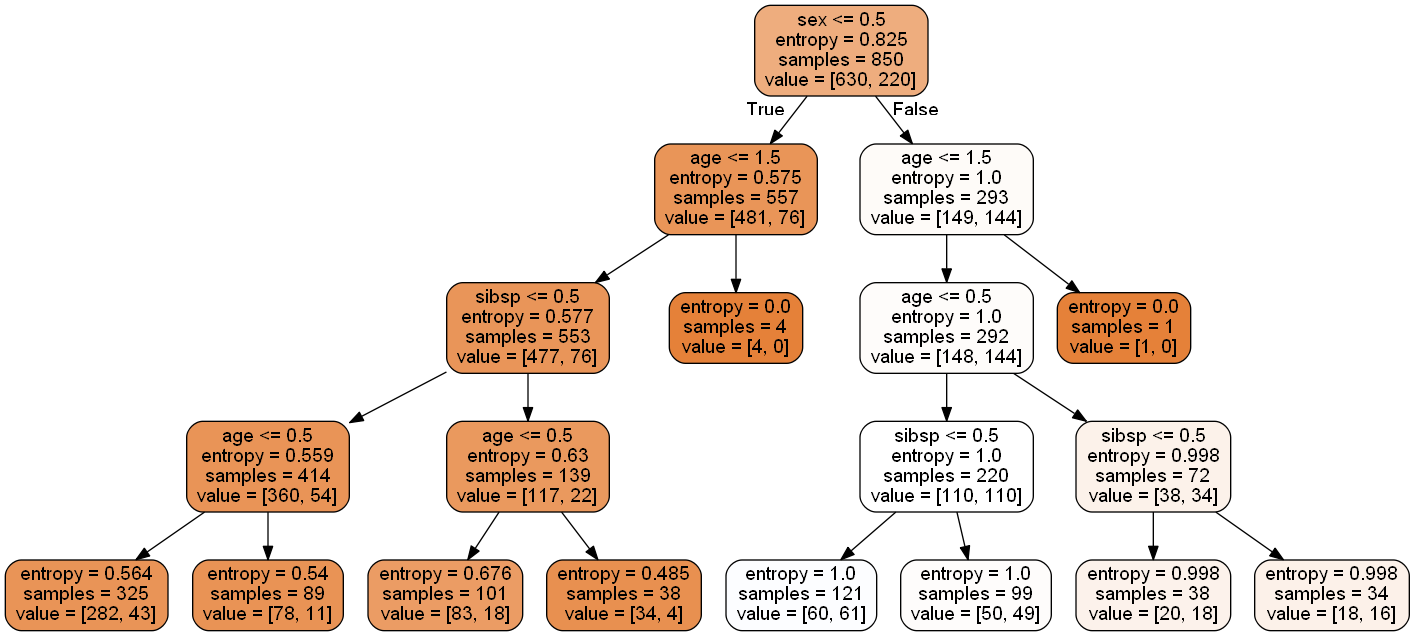

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image

data =  pd.read_csv("train_and_test2.csv")
record=[]
record_list=[]
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        if j==0:
            if data.values[i,j] <= 35:
                record_list.append(0)    # young
            elif data.values[i,j] <= 65:
                record_list.append(1)    # middle
            else:
                record_list.append(2)    # old
        elif j==2:
            if data.values[i,j] == 0:
                record_list.append(0)    # no
            else:
                record_list.append(1)    # yes
        else:
            record_list.append(data.values[i,j])
    record.append([(record_list[k]) for k in range(0,len(record_list))])
    record_list=[]

X = np.array(record)[:, :3]
Y = np.array(record)[:, 3]
print(X)
print(Y)

#testing data 35%
X_data,Y_data,X_label,Y_label = train_test_split(X, Y, test_size=0.35, random_state=42)

# Using decision tree for classification
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_data, X_label)
print("clf: " + str(clf)) 

# Visualize model
dot_data = tree.export_graphviz(clf, feature_names=['age','sex','sibsp'], filled=True, rounded=True, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('ID3.pdf')
Image(graph.create_png())

[[0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[0. 1. 1. ... 0. 0. 0.]
clf: DecisionTreeClassifier(criterion='entropy')


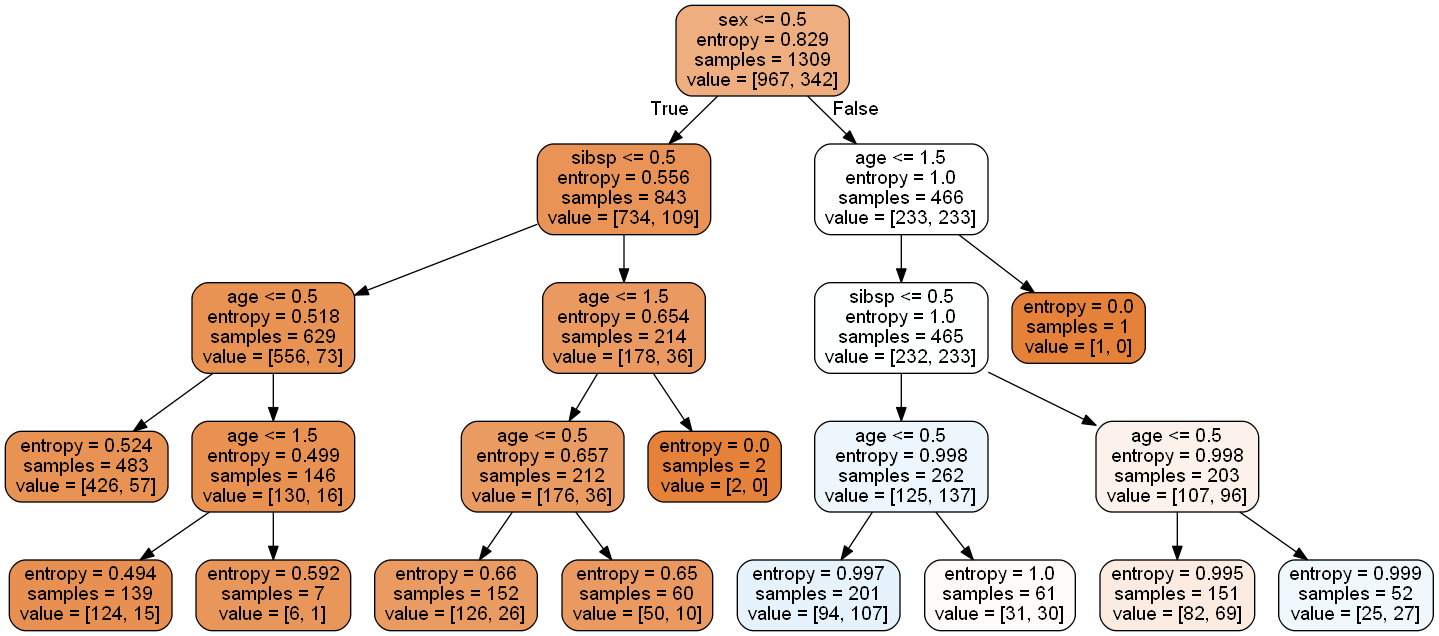

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pydotplus    #pip install pydotplus (Visualization)
from IPython.display import Image #display result on jupyter

data =  pd.read_csv("train_and_test2.csv")
record=[]
record_list=[]
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        if j==0:
            if data.values[i,j] <= 35:
                record_list.append(0)    # young
            elif data.values[i,j] <= 65:
                record_list.append(1)    # middle
            else:
                record_list.append(2)    # old
        elif j==2:
            if data.values[i,j] == 0:
                record_list.append(0)    # no
            else:
                record_list.append(1)    # yes
        else:
            record_list.append(data.values[i,j])
    record.append([(record_list[k]) for k in range(0,len(record_list))])
    record_list=[]
X = np.array(record)[:, :3]
Y = np.array(record)[:, 3]
print(X)
print(Y)

#All data is training data
 
# Using decision tree for classification
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)
print("clf: " + str(clf)) 
 
# Visualize model
dot_data = tree.export_graphviz(clf, feature_names=['age','sex','sibsp'], filled = True, rounded = True, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf('ID3.pdf')
Image(graph.create_png())


[[0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[0. 1. 1. ... 0. 0. 0.]


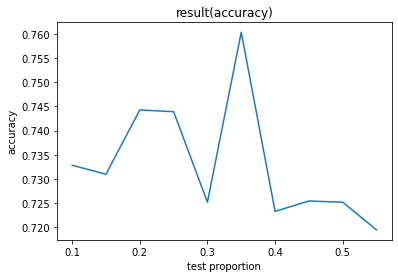

In [3]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pydotplus    #pip install pydotplus (Visualization)
from IPython.display import Image #display result on jupyter

data =  pd.read_csv("train_and_test2.csv")
record=[]
record_list=[]
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        if j==0:
            if data.values[i,j] <= 35:
                record_list.append(0)    # young
            elif data.values[i,j] <= 65:
                record_list.append(1)    # middle
            else:
                record_list.append(2)    # old
        elif j==2:
            if data.values[i,j] == 0:
                record_list.append(0)    # no
            else:
                record_list.append(1)    # yes
        else:
            record_list.append(data.values[i,j])
    record.append([(record_list[k]) for k in range(0,len(record_list))])
    record_list=[]
    
X = np.array(record)[:, :3]
Y = np.array(record)[:, 3]
print(X)
print(Y)

# setting the proportion of test data
test_proportion = [0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55]
accuracy = []

#看如何切效果最好
 
for i in range(10):
    X_data,Y_data,X_label,Y_label = train_test_split(X, Y, test_size=test_proportion[i], random_state=42)
    # Using decision tree for classification
    clf=tree.DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_data, X_label)
    #print("clf: " + str(clf)) 
    predictedY = clf.predict(Y_data)  
    accuracy.append(accuracy_score(Y_label, predictedY))


# Visualize the accuracy results
plt.title('result(accuracy)')
plt.xlabel('test proportion')
plt.ylabel('accuracy')
plt.plot(test_proportion, accuracy)
plt.show()


